# HOME ASSIGNMENT 2
## Algoritmo di Deutcsh-Jozsa

Implementare l'algoritmo su un sistema a due qubit per una funzione bilanciata

## 1. Introduzione

Questo algoritmo è stato uno dei primi esempi che evidenziano il vantaggio computazionale di un algoritmo quantistico rispetto a uno classico.\
Si può considerare come un estensione di quello di Deutch, in quanto permette di lavorare con funzioni a n bit di input.

### 1.1 Il problema

Data una funzione $f: \{0,1\}^n \rightarrow \{0,1\}$ con n bit di input e un bit di output, si vuole determinare se è costante o bilanciata.\
Una funzione è **costante** se assume lo stesso valore per ogni input, **bilanciata** se assume 0 per metà degli input e 1 per la restante metà.

### 1.2 L'approccio classico

Per determinare il tipo servono almeno due chiamate alla funzione nel caso migliore. Infatti se otteniamo due output diversi per due stringhe di input diverse, allora la funzione sarà sicuramente bilanciata.\
Nel caso peggiore dobbiamo testare metà più uno input per capire se la funzione è costante. In particolare, se abbiamo *n* bit, servono $2^{n-1}+1$ chiamate alla funzione.

### 1.3 L'approccio quantistico

Con questa strategia il problema viene risolto chiamando la funzione $f$ una sola volta.\
Il circuito quantistico che implementa l'algoritmo è rappresentato in figura.
$\\[10px]$

![Circuito](circuito_dj.png)

$\\[10px]$

#### 1.3.1 I passaggi

1. Si prepararano due registri quantistici. Il primo formato da *n*-qubit, inizializzati a $|0\rangle$ e il secondo formato da un qubit inizializzato a $|1\rangle$.

$$\vert \psi_0 \rangle = \vert0\rangle^{\otimes n} \vert 1\rangle$$

2. Applichiamo $n+1$ porte di Hadamard, per ottenere la sovrapposizione di tutte le stringhe di bit che rappresentano gli interi da 0 a $N-1=2^n-1$

$$\vert \psi_1 \rangle = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} \vert x\rangle \frac{\vert 0\rangle - \vert 1 \rangle}{\sqrt{2}}$$

3. Applichiamo l'operatore $U_f:\vert x\rangle \vert y\rangle \rightarrow \vert x\rangle \vert y \oplus f(x)\rangle$, otteniamo lo stato:

$$
\vert \psi_2 \rangle = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} \vert x\rangle \otimes
\frac{\vert 0 \oplus f(x)\rangle - \vert 1 \oplus f(x)\rangle}{\sqrt{2}}$$
$\\[20px]$
se $f(x)=0 \rightarrow \vert 0 \oplus 0 \rangle - \vert 1 \oplus 0 \rangle = \vert 0 \rangle - \vert 1 \rangle = (-1)^{f(x)}(\vert 0 \rangle - \vert 1 \rangle)\\[5px]$
se $f(x)=1 \rightarrow \vert 0 \oplus 1 \rangle - \vert 1 \oplus 1 \rangle = \vert 1 \rangle - \vert 0 \rangle = (-1)^{f(x)}(\vert 0 \rangle - \vert 1 \rangle)\\[5px]$

sinteticamente possiamo scrivere:

$$\vert \psi_2 \rangle = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} (-1)^{f(x)} \vert x\rangle \otimes\frac{\vert 0\rangle - \vert 1\rangle}{\sqrt{2}}$$

Possiamo notare che il qubit $\vert y \rangle$ è rimasto nello stato $\dfrac{\vert 0\rangle - \vert 1 \rangle}{\sqrt{2}}$, mentre il registro $\vert x \rangle$ ha acquisito una fase $(-1)^{f(x)}$

4. Applichiamo n porte di Hadamard ai primi *n* qubit.
Consideriamo l'effetto di una singola porta di Hadamard sul generico stato $\vert k \rangle$ con k=0, 1
$$H\vert k \rangle = \frac{1}{\sqrt{2}}\sum_{z=0}^{1}(-1)^{k\, z} \vert z \rangle$$
Dato che lo stato $\vert x \rangle \equiv \vert x_1, x_2, \dots, x_n \rangle$, l'effetto di n porte di Hadamard può essere scritto come:

$$H^{\otimes n}\vert x_1, x_2, \dots, x_n \rangle = \sum_{z_1, z_2, \dots, z_n=0}^{1} \frac{(-1)^{x_1z_1+x_2z_2+\dots +x_nz_n}}{\sqrt{N}}
\vert z_1, z_2, \dots, z_n \rangle$$

L'esponente rappresenta il prodotto interno bit a bit $x\cdot z$, l'espressione precedente può essere riscritta come:
$$H^{\otimes n}\vert x \rangle = \sum_{z=0}^{N-1} \frac{(-1)^{x \cdot z}}{\sqrt{N}}\vert z \rangle$$

Sostituiamo questo risultato nell'espressione di $\vert \psi_2 \rangle$:
$$\vert \psi_3 \rangle = \sum_{x=0}^{N-1} \sum_{z=0}^{N-1} \frac{(-1)^{x \cdot z + f(x)}}{\sqrt{N}}\vert z \rangle
\frac{\vert 0\rangle - \vert 1 \rangle}{\sqrt{2}}$$

5. Infine effettuiamo una misura sui primi *n* qubit.\
Consideriamo lo stato $\vert z \rangle = \vert 0^{\otimes n} \rangle$, dato che $z = 0 \rightarrow x \cdot z = 0$, la sua ampiezza di
probabilità sarà $\sum_{x=0}^{N-1} \dfrac{(-1)^{f(x)}}{N}$\
Consideriamo i due casi della funzione.\
Se f è *costante* $f(x)=\bar f$ allora il termine $(-1)^{f(x)}=(-1)^{\bar f}$ non dipende da x e può essere portato fuori dalla sommatoria:

$$\sum_{x=0}^{N-1} \frac{(-1)^{f(x)}}{N}=(-1)^{\bar f}\sum_{x=0}^{N-1} \frac{1}{N}=(-1)^{\bar f}$$

Tale valore risulta 1 o -1. Per la condizione di nomalizzazione di $\vert \psi_3 \rangle$ tutti gli altri stati devono avere coefficienti nulli.\
Una misura dei primi *n* qubit restituirà la stringa $0,0, \dots, 0$ con probabilità 100%.
$\\[10px]$
Se f è *bilanciata* la sommatoria conterrà metà termini con valore +1 e metà con -1, ottenendo il totale di 0.\
La probabilità di ottenere lo stato $\vert 0 \rangle \equiv \vert 0,0, \dots, 0\rangle$ è nulla, quindi se nella misura finale otteniamo almeno un bit a 1, la funzione è bilanciata.

#### 1.3.2 Riassumendo

Se nella misura finale otteniamo la stringa $\vert 0 \rangle \equiv \vert 0,0, \dots, 0\rangle$, la funzione è *costante*.\
Se otteniamo anche un solo bit a 1, la funzione è *bilanciata*.

## 2. Simulazione utilizzando Qiskit

### 2.1 Circuito quantistico

Importiamo le librerie necessarie per il programma

In [33]:
# Qiskit
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import ClassicalRegister


Fissiamo il numero di qubit della nostra funzione da testare, nel nostro caso n=2

In [34]:
# numero di ingressi
n = 2

# creo il circuito con n+1 qubit
q = QuantumRegister(n+1, 'q')
c = ClassicalRegister(n, 'c')
qc= QuantumCircuit(q, c)

Inizializziamo i primi n qubit a 0 e l'ultimo a 1 tramite una porta X

In [35]:
qc.x(n)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

Applichiamo n+1 porte di Hadamard per generare la sovrapposizione degli stati di ingresso

In [36]:
qc.h(range(n+1))

Per implementare l'oracolo $U_f:\vert x\rangle \vert y\rangle \rightarrow \vert x\rangle \vert y \oplus f(x)\rangle$ per una funzione bilanciata,
possiamo applicare *n* porte CNOT al qubit contenente lo stato $\vert y\rangle$ utilizzando i qubit del registro $\vert x\rangle$ come controllo.

In [37]:
# barriere per evidenziare l'oracolo
qc.barrier()

# applico le porte CNOT
for qi in range(n):
    qc.cx(qi, n)
    
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

Applichiamo nuovamente le porte di Hadamard

In [38]:
qc.h(range(n+1))
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

Facciamo la misura

In [39]:
for i in range(n):
    qc.measure(i, i)

Disegnamo il circuito

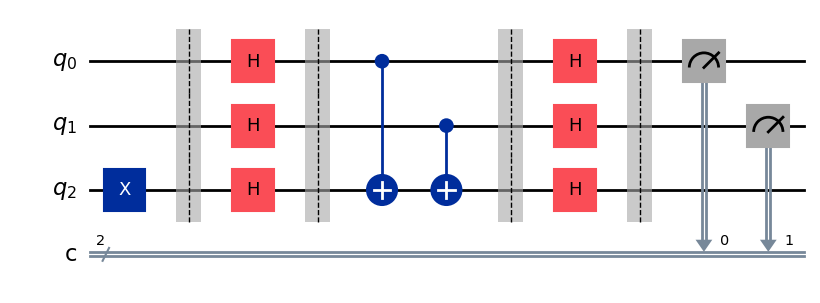

In [40]:
qc.draw(output='mpl')

### 2.2 Simulazione

Effettuiamo i passaggi per eseguire l'algoritmo su un *backend* fittizio

In [41]:
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
backend = FakeBrisbane()

Ottimizziamo il circuito per essere eseguito su questo dispositivo

In [42]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

isa_circuit = pm.run(qc)

Eseguiamo l'algoritmo 10000 volte

In [43]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

nshots = 10_000
sampler = Sampler(mode=backend)
sampler.options.default_shots = nshots
result = sampler.run([isa_circuit]).result()
counts = result[0].data.c.get_counts()

Visualizziamo i risultati delle misure

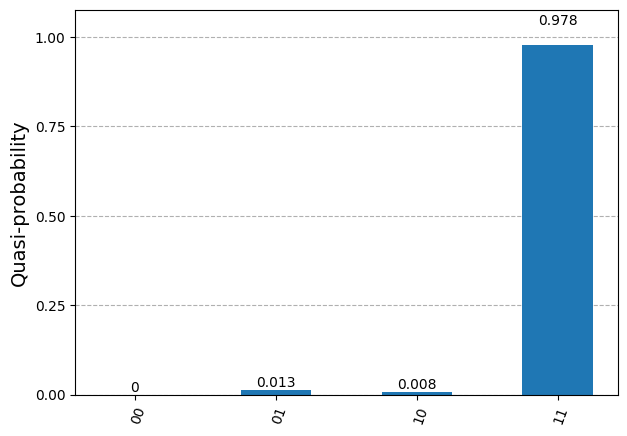

In [44]:
from qiskit.visualization import plot_distribution

plot_distribution(counts)

### 2.3 Risultati

Dal grafico possiamo notare che la probabilità di ottenere lo stato $\vert 00 \rangle$ è nulla, possiamo concludere che la funzione è bilanciata.

## 3. Esecuzione su un computer quantistico reale

Ripetiamo i passaggi effettuati in precedenza ma questa volta utilizziamo un *backend* reale

In [45]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)
print("backend utilizzato: ", backend)

backend utilizzato:  <IBMBackend('ibm_kyiv')>


Ottimizzazione circuito

In [46]:
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

isa_circuit = pm.run(qc)

Esecuzione dell'algoritmo

In [48]:
sampler = Sampler(mode=backend)

nshots = 10_000
job = sampler.run([isa_circuit], shots=nshots)
job_id = job.job_id()
print(job_id)

cy9t1he7v8tg008ftb9g


Recupero dei dati elaborati dal computer quantistico

In [49]:
job = service.job(job_id)
job_result = job.result()
counts = job_result[0].data.c.get_counts()

Visualizzazione dei dati

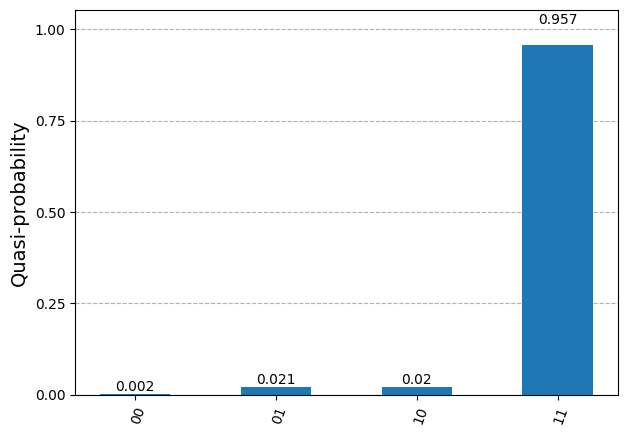

In [50]:
plot_distribution(counts)

### 3.1 Conclusioni

L'esecuzione su un dispositivo reale conferma la simulazione, tuttavia possiamo notare che la probabilità di ottenere lo stato $\vert 00 \rangle$ non è più nulla, ma abbiamo una percentuale trascurabile dovuta al rumore dei componenti reali.